Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.width', 1000)
# from grader import Grader

In [5]:
DATA_FOLDER = './pandas/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [7]:
# grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [8]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)


(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [9]:
print(transactions.describe())
print(transactions.dtypes)
transactions.head()

       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [13]:
date_splits = transactions.date.apply(lambda date: date.split('.'))
years = [int(year) for _, _, year in date_splits]
months = [int(month) for _, month, _ in date_splits]
days = [int(day) for day, _, _ in date_splits]
print(years[0:10], months[0:10], days[0:10])

transactions['year'] = years
transactions['month'] = months
transactions['day'] = days
transactions.head()


[2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [2, 3, 5, 6, 15, 10, 2, 4, 11, 3]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,02.01.2013,0,59,22154,999.00,1.0,2013,1,2
1,03.01.2013,0,25,2552,899.00,1.0,2013,1,3
2,05.01.2013,0,25,2552,899.00,-1.0,2013,1,5
3,06.01.2013,0,25,2554,1709.05,1.0,2013,1,6
4,15.01.2013,0,25,2555,1099.00,1.0,2013,1,15


In [14]:
transactions['revenue'] = transactions['item_price']*transactions['item_cnt_day']
df = pd.merge(transactions, items, on='item_id')
df = pd.merge(df, item_categories, on='item_category_id')
df = pd.merge(df, shops, on='shop_id')

df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,revenue,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,2013,1,2,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0,1.0,2013,4,26,150.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5,1.0,2013,6,26,199.5,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5,1.0,2013,7,20,199.5,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0,2.0,2013,9,14,598.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [15]:
# YOUR CODE GOES HERE


max_revenue =  df[(df.year==2014) &(df.month==9)].groupby('shop_id')['revenue'].sum().max()
# PUT YOUR ANSWER IN THIS VARIABLE
# grader.submit_tag('max_revenue', max_revenue)

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [17]:
# YOUR CODE GOES HERE

category_id_with_max_revenue =  df[(df.year==2014) & (df.month <= 8) & (df.month >= 6)].groupby('item_category_id')['revenue'].sum().idxmax()
#32157302.430000111
print(category_id_with_max_revenue)
# grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [20]:
df1 = df.groupby('item_id').apply(lambda group:  pd.Series([len(group.item_price.unique())], index=['unique_count']))
df1.head()

,unique_count
item_id,
0,1
1,1
2,1
3,2
4,1


In [21]:
# YOUR CODE GOES HERE

num_items_constant_price = len(df1[df1.unique_count==1])
# grader.submit_tag('num_items_constant_price', num_items_constant_price)

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 

              date  shop_id  item_cnt_day
202462  01.12.2014       25           1.0
206249  01.12.2014       25           1.0
211845  01.12.2014       25           1.0
212036  01.12.2014       25           1.0
212255  01.12.2014       25           1.0
212798  01.12.2014       25           1.0
214778  01.12.2014       25           1.0
215065  01.12.2014       25           1.0
215230  01.12.2014       25           1.0
215857  01.12.2014       25           1.0
216060  01.12.2014       25           1.0
216086  01.12.2014       25           3.0
216124  01.12.2014       25           1.0
220253  01.12.2014       25           1.0
222668  01.12.2014       25           1.0
223521  01.12.2014       25           1.0
223891  01.12.2014       25           1.0
225388  01.12.2014       25           1.0
228517  01.12.2014       25           1.0
229738  01.12.2014       25           1.0
230332  01.12.2014       25           1.0
230627  01.12.2014       25           1.0
230953  01.12.2014       25       

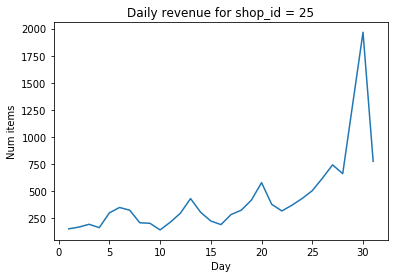

117167.70229885059


In [26]:
shop_id = 25
df_group = df[(df.year==2014) & (df.month==12) & (df.shop_id==shop_id)].groupby('day')
total_num_items_sold = df_group['item_cnt_day'].sum()
days = [key for key in df_group.groups.keys()]

print(df_group.get_group(1)[['date', 'shop_id', 'item_cnt_day']])


# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

print(total_num_items_sold.var())
total_num_items_sold_var = total_num_items_sold.var()
# grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [24]:
STUDENT_EMAIL = 'microsheen@gmail.com'# EMAIL HERE
STUDENT_TOKEN = 'TFXNPkI1UzBI7Uqv'# TOKEN HERE''
# grader.status()

In [25]:
# grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)